In [10]:
#libraries

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [13]:
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [14]:
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical

In [15]:
#path

In [16]:
path = 'C:/Users/JITHENDRA/Downloads/facial rec mini proj/challenges-in-representation-learning-facial-expression-recognition-challenge/'
os.listdir(path)

['example_submission.csv',
 'fer2013.tar.gz',
 'icml_face_data.csv',
 'test.csv',
 'train.csv']

In [17]:
data = pd.read_csv(path+'icml_face_data.csv')

In [18]:
data.head()

emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...

In [19]:

def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()


In [20]:
data[' Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name:  Usage, dtype: int64

In [21]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [22]:
train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

In [23]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

Encoding of the target value:

In [24]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

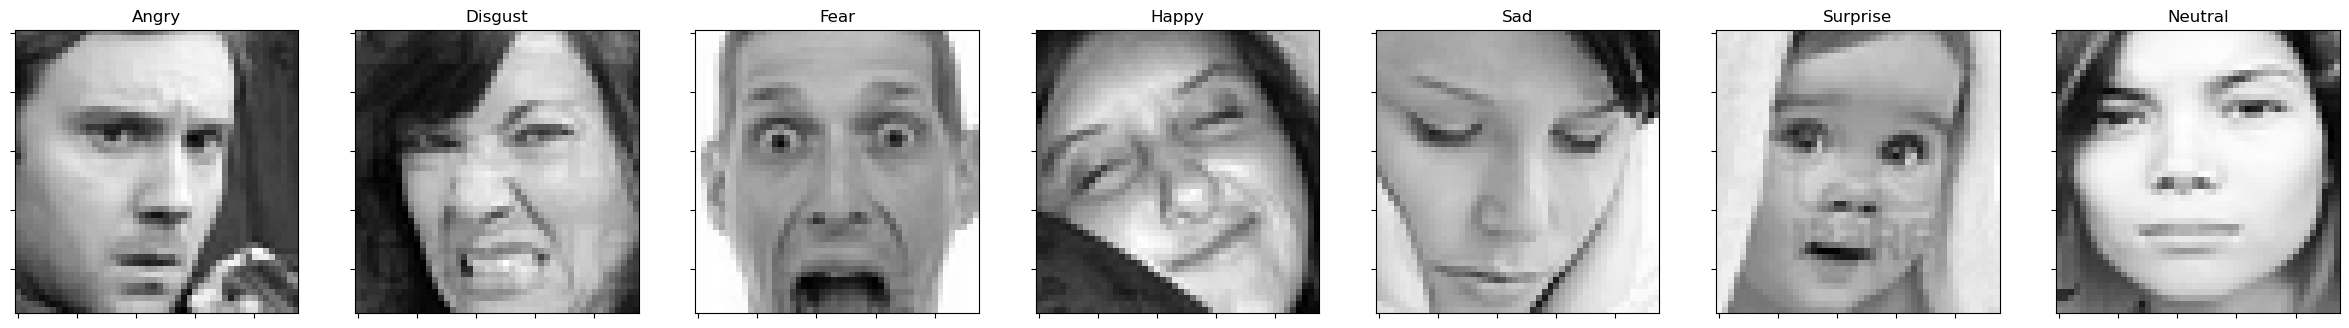

In [25]:
plot_all_emotions()

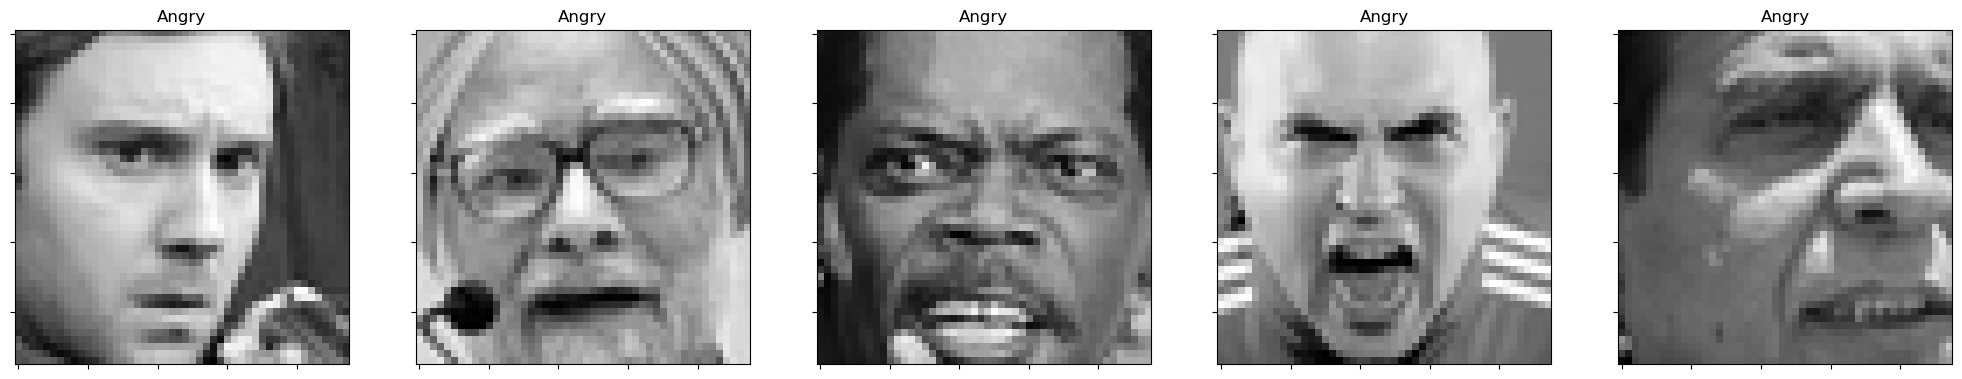

In [26]:
plot_examples(label=0)

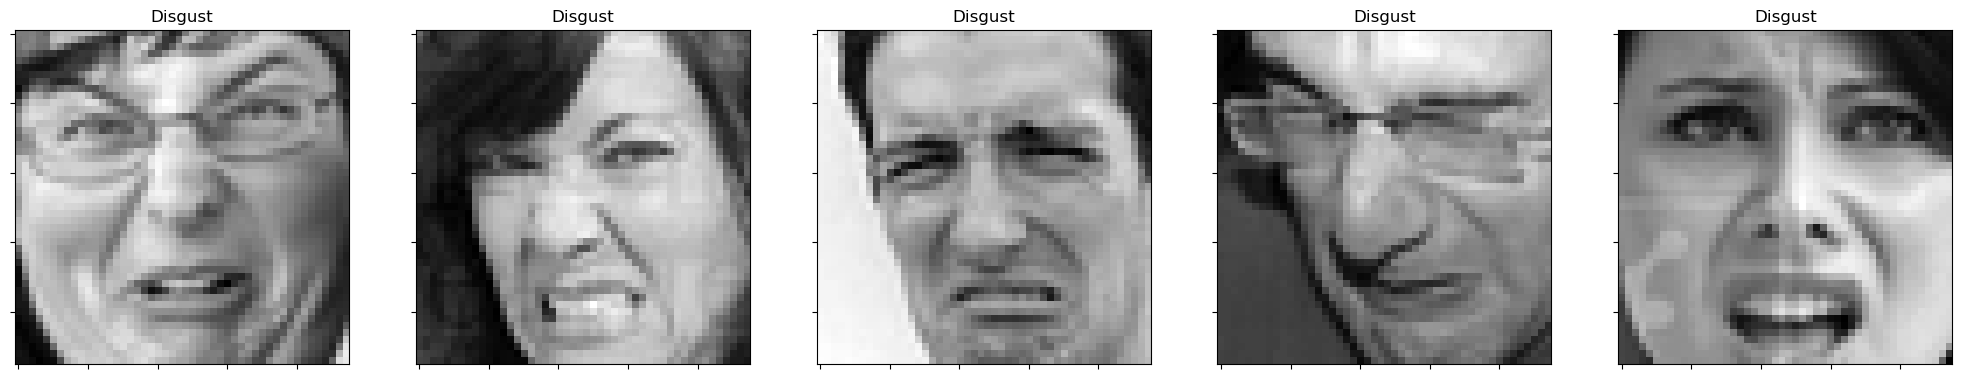

In [27]:
plot_examples(label=1)

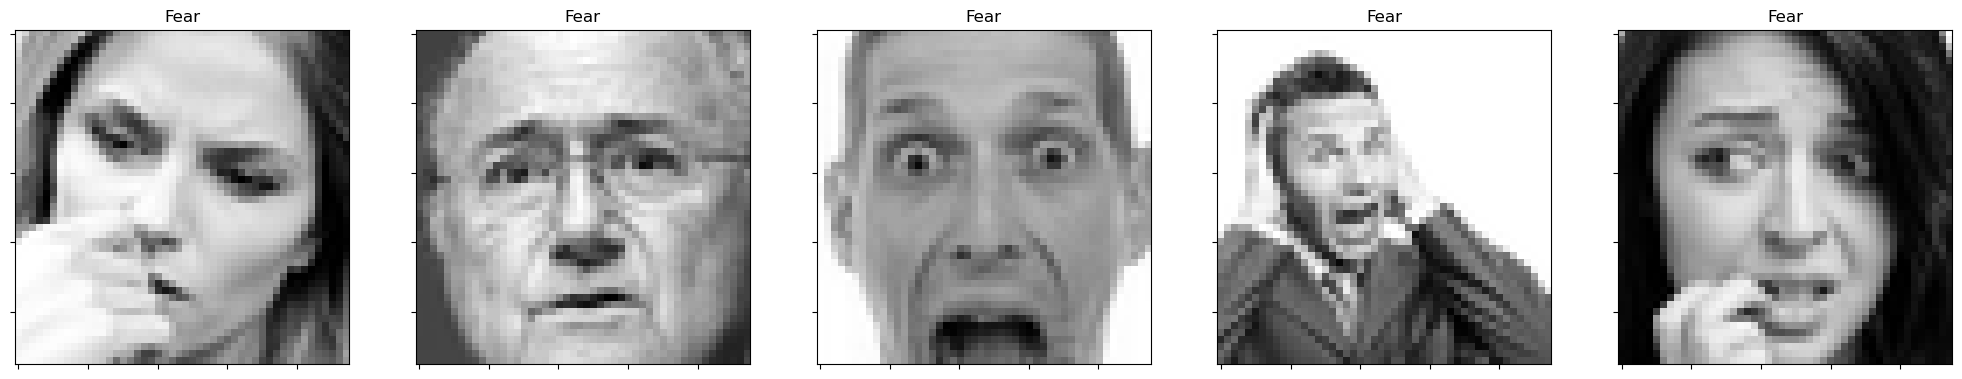

In [28]:
plot_examples(label=2)

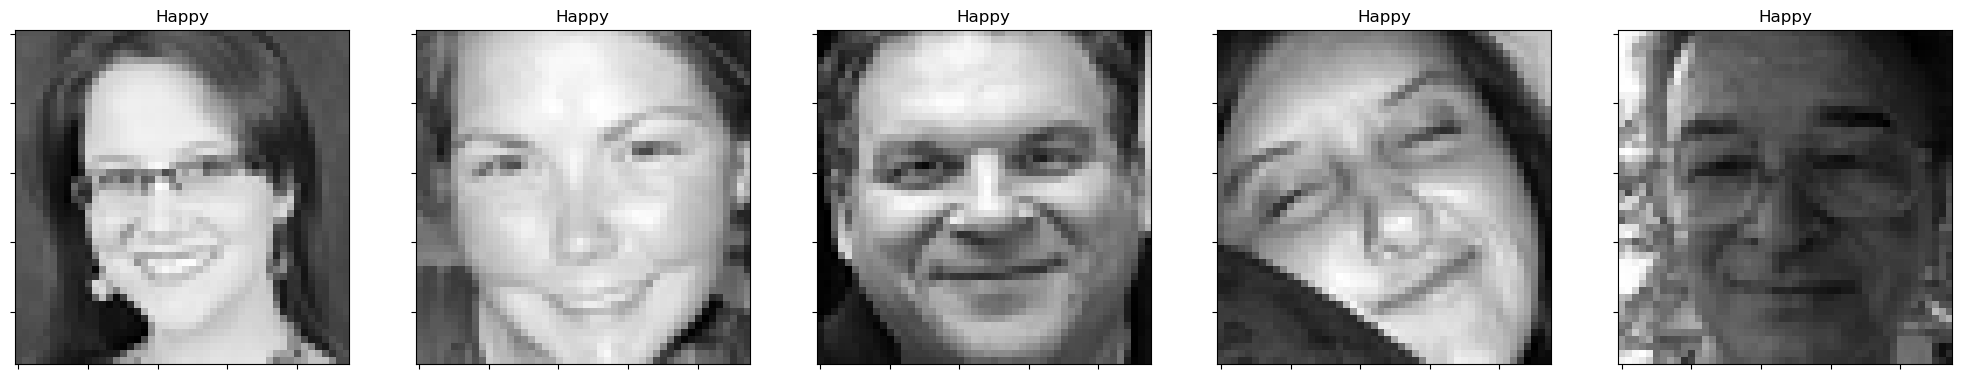

In [29]:
plot_examples(label=3)

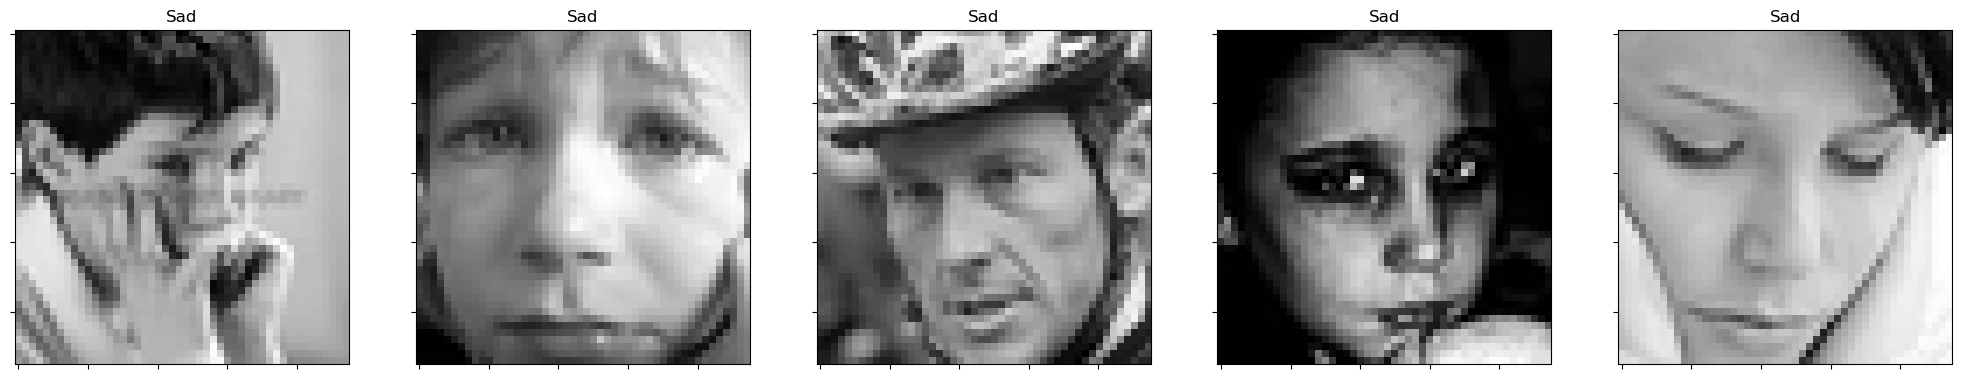

In [30]:
plot_examples(label=4)

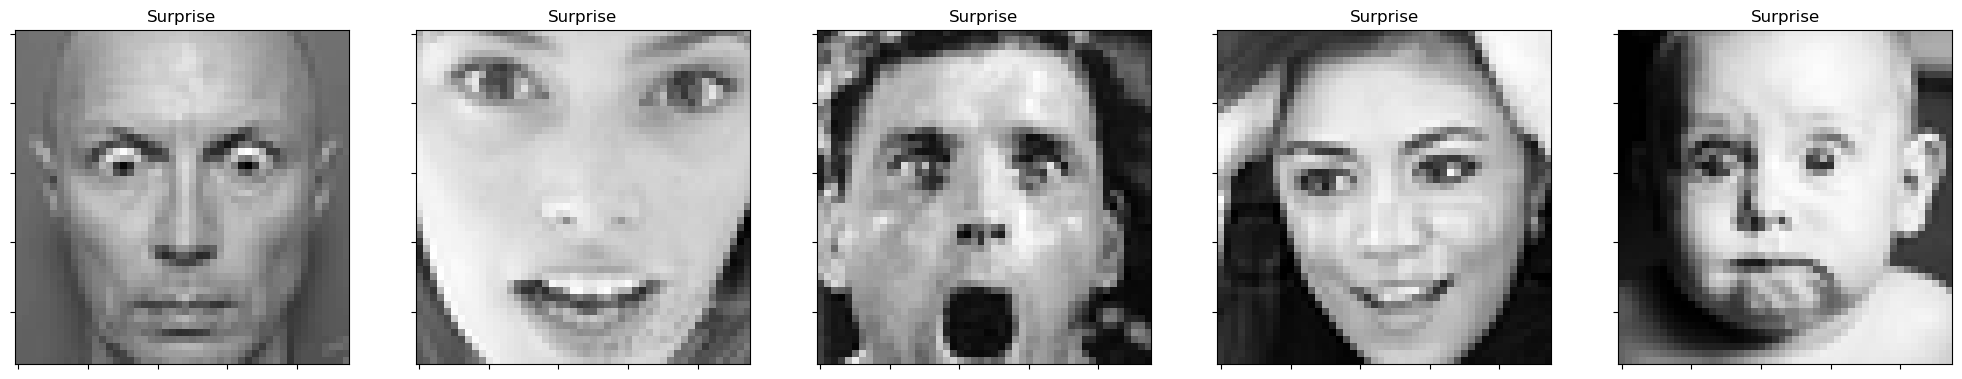

In [31]:
plot_examples(label=5)

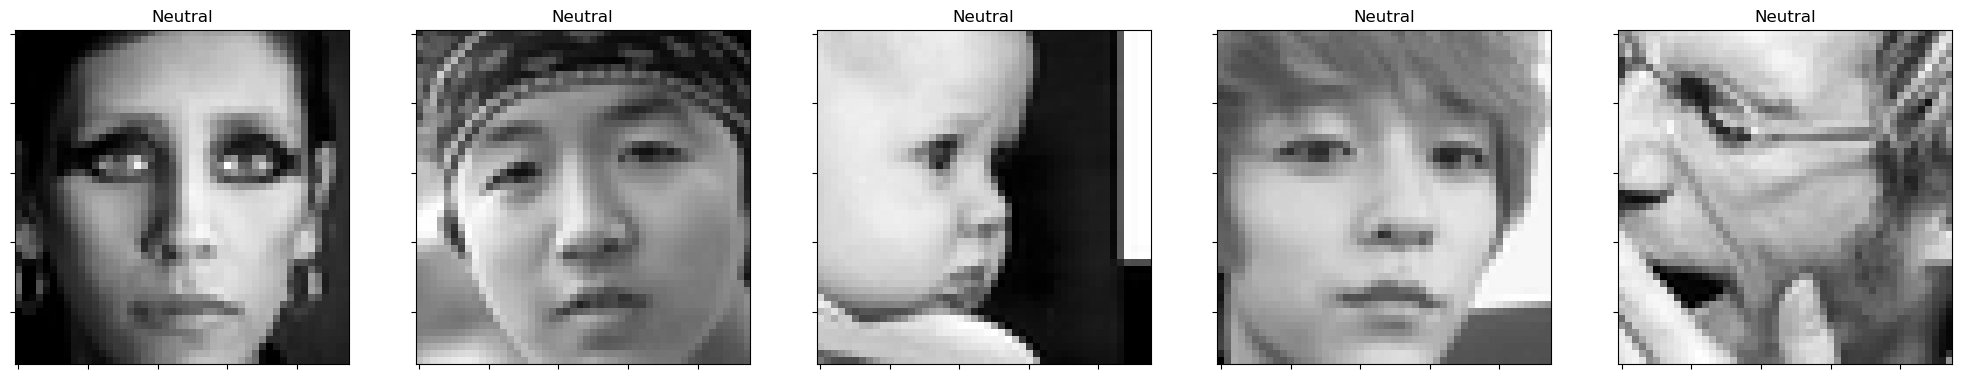

In [32]:
plot_examples(label=6)

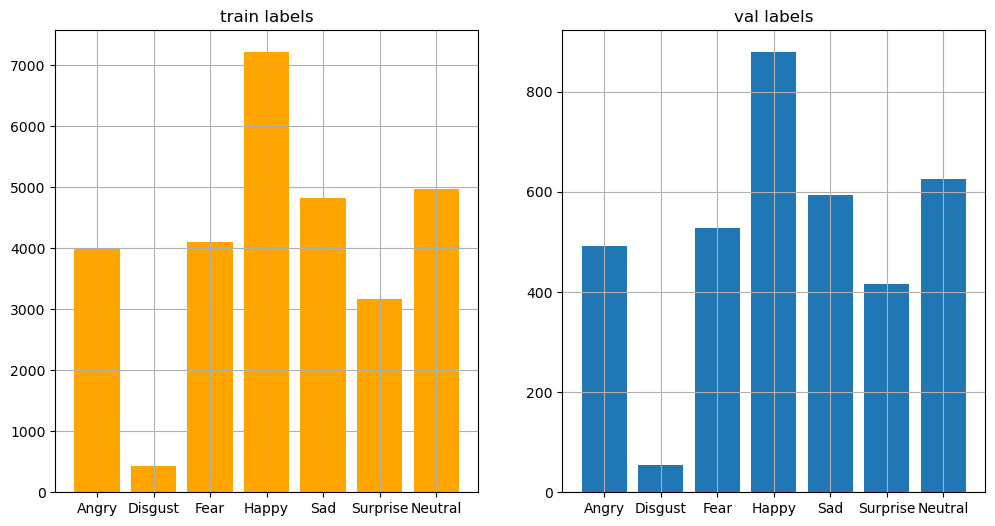

In [33]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

In [34]:
class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))

In [35]:
class_weight

{0: 0.1391549688251071,
 1: 0.01518687519593159,
 2: 0.14270786164617366,
 3: 0.2513149186666202,
 4: 0.16823992476226968,
 5: 0.11045316799609878,
 6: 0.17294228290779895}

In [36]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [39]:
history = model.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    class_weight = class_weight,
                    epochs=12,
                    batch_size=64)

Epoch 1/12
449/449 [==============================] - 37s 80ms/step - loss: 0.2618 - accuracy: 0.3333 - val_loss: 1.6538 - val_accuracy: 0.3759
Epoch 2/12
449/449 [==============================] - 38s 85ms/step - loss: 0.2262 - accuracy: 0.4391 - val_loss: 1.5077 - val_accuracy: 0.4455
Epoch 3/12
449/449 [==============================] - 34s 76ms/step - loss: 0.2087 - accuracy: 0.4831 - val_loss: 1.4077 - val_accuracy: 0.4773
Epoch 4/12
449/449 [==============================] - 31s 68ms/step - loss: 0.1953 - accuracy: 0.5191 - val_loss: 1.3144 - val_accuracy: 0.5060
Epoch 5/12
449/449 [==============================] - 31s 68ms/step - loss: 0.1851 - accuracy: 0.5442 - val_loss: 1.3074 - val_accuracy: 0.5160
Epoch 6/12
449/449 [==============================] - 30s 66ms/step - loss: 0.1764 - accuracy: 0.5648 - val_loss: 1.2963 - val_accuracy: 0.5222
Epoch 7/12
449/449 [==============================] - 30s 67ms/step - loss: 0.1677 - accuracy: 0.5859 - val_loss: 1.2506 - val_accuracy:

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 2s 13ms/step - loss: 1.3259 - accuracy: 0.5458
test caccuracy: 0.545834481716156


In [41]:
pred_test_labels = model.predict(test_images)

113/113 [==============================] - 2s 13ms/step


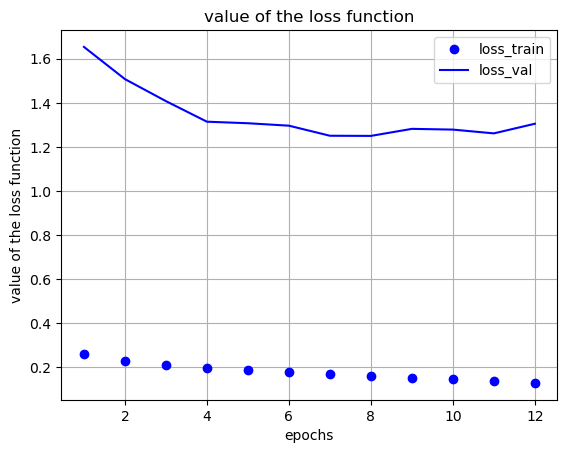

In [42]:
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='loss_train')
plt.plot(epochs, loss_val, 'b', label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

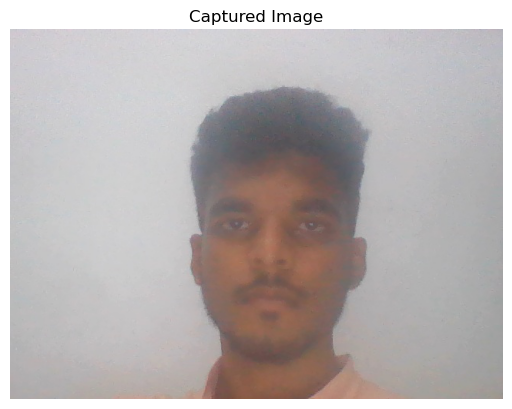

1/1 [==============================] - 0s 25ms/step


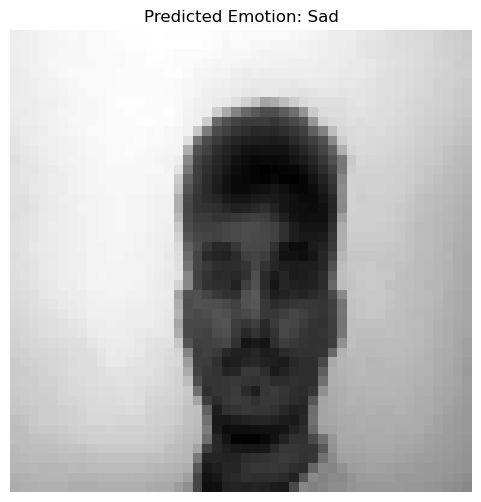

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
path_to_captured_image = 'C:/Users/JITHENDRA/Downloads/facial rec mini proj/images/captured_image.jpg'
captured_image = Image.open(path_to_captured_image)

# Display the captured image
plt.imshow(captured_image)
plt.title('Captured Image')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
# Load your custom image from your file system
path_to_your_image = 'C:/Users/JITHENDRA/Downloads/facial rec mini proj/images/captured_image.jpg'
custom_image = Image.open(path_to_your_image)

# Convert the image to grayscale (if needed)
custom_image = custom_image.convert('L')

# Resize the image to match the dimensions of the training images (48x48)
custom_image = custom_image.resize((48, 48))

# Convert the image to a numpy array
custom_image_array = np.array(custom_image)

# Normalize the pixel values
custom_image_array = custom_image_array.astype('float32') / 255.0

# Reshape the image to fit the model input shape
custom_image_array = custom_image_array.reshape((1, 48, 48, 1))

# Use the model to predict the emotion for this image
predicted_emotion = model.predict(custom_image_array)

# Define emotions dictionary if it's not defined already
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Plot the custom image and its predicted emotion
fig, ax = plt.subplots(figsize=(6, 6))


ax.imshow(custom_image_array.reshape(48, 48), cmap='gray')
ax.set_title(f'Predicted Emotion: {emotions[np.argmax(predicted_emotion)]}')
ax.axis('off')

plt.show()


In [44]:
emotion={emotions[np.argmax(predicted_emotion)]}
print(emotion)

{'Sad'}


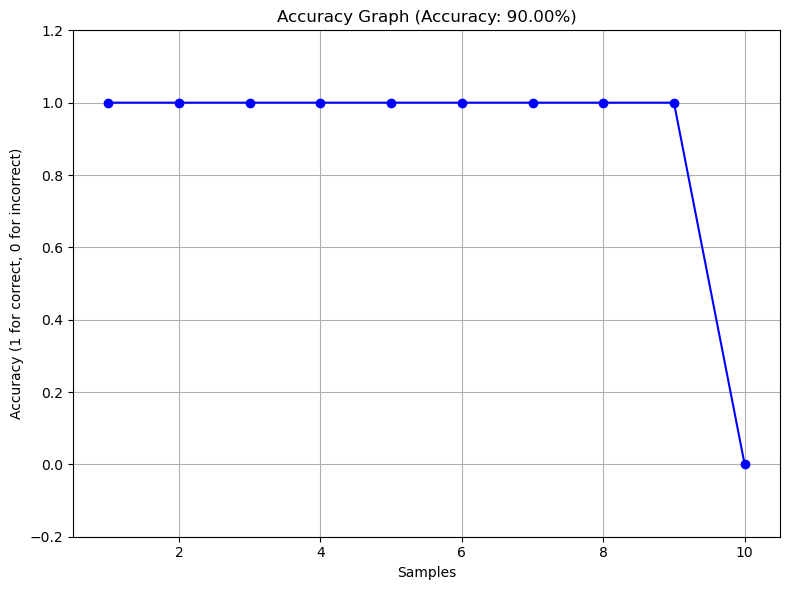

In [45]:
# Example of predicted_emotions and true_labels (replace with your actual data)
predicted_emotions = ['Angry', 'Happy', 'Sad', 'Happy', 'Surprise', 'Happy', 'Sad', 'Happy', 'Neutral', 'Sad']
true_labels = ['Angry', 'Happy', 'Sad', 'Happy', 'Surprise', 'Happy', 'Sad', 'Happy', 'Neutral', 'Fear']

# Calculate accuracy
correct_predictions = sum(1 for pred, true in zip(predicted_emotions, true_labels) if pred == true)
total_predictions = len(true_labels)
accuracy = correct_predictions / total_predictions * 100

# Plotting the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot([i + 1 for i in range(total_predictions)], [1 if pred == true else 0 for pred, true in zip(predicted_emotions, true_labels)], marker='o', linestyle='-', color='b')
plt.xlabel('Samples')
plt.ylabel('Accuracy (1 for correct, 0 for incorrect)')
plt.title(f'Accuracy Graph (Accuracy: {accuracy:.2f}%)')
plt.ylim(-0.2, 1.2)
plt.xlim(0.5, total_predictions + 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()


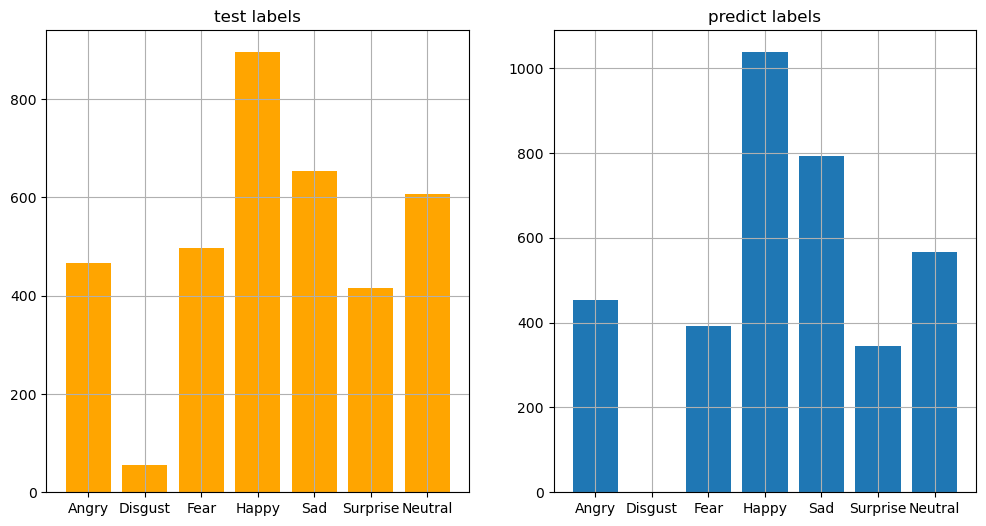

In [46]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

In [47]:
#analysis

In [48]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

C:\Users\JITHENDRA\AppData\Local\Temp\ipykernel_12348\94775150.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


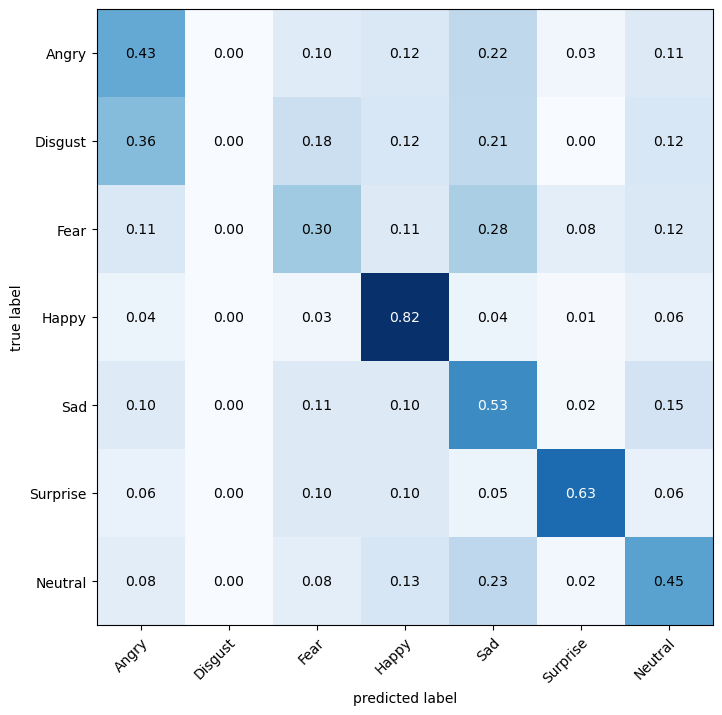

In [49]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

In [50]:
emotion=emotions[np.argmax(predicted_emotion)]
print(emotion)

Sad


In [52]:
import pygame
import os

# Initialize pygame
pygame.init()

# Path to the folder containing music files
music_folder = r"C:\Users\JITHENDRA\Downloads\facial rec mini proj\pyhton\Songs"

# Get a list of music files in the emotion folder
music_files = [file for file in os.listdir(os.path.join(music_folder, emotion)) if file.endswith(".mp3")]

# Create a dictionary to map keys to music files
music_dict = {str(i + 1): os.path.join(music_folder, emotion, file) for i, file in enumerate(music_files)}

# Play songs continuously from the specified folder
try:
    for key in music_dict:
        pygame.mixer.music.load(music_dict[key])
        pygame.mixer.music.play(-1)  # -1 makes the music play indefinitely

        while pygame.mixer.music.get_busy():
            print("Saveetha Engineering College")
            print("MUSIC THERAPHY USING EMOTION DETECTION REALTIME CAPTURE USING CNN")
            user_input = input("Press 's' to stop the music: ")
            if user_input.lower() == 's':
                pygame.mixer.music.stop()
                break
except KeyboardInterrupt:
    pygame.mixer.music.stop()
    pygame.quit()


Saveetha Engineering College
MUSIC THERAPHY USING EMOTION DETECTION REALTIME CAPTURE USING CNN
Press 's' to stop the music: s
